# Black Friday Sales Prediction

#### Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"]=[25,10]
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",50)


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape,test.shape

((550068, 12), (233599, 11))

In [4]:
train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [5]:
combined = pd.concat([train,test],ignore_index=True)
combined.shape

(783667, 12)

In [6]:
combined.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
combined.corr()


#no correlation

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023976,0.020276,0.004568,0.002291,0.002490,0.004716
Occupation,-0.023976,1.000000,0.023563,-0.008441,-0.000773,0.010450,0.020833
Marital_Status,0.020276,0.023563,1.000000,0.019579,0.017131,0.018471,-0.000463
Product_Category_1,0.004568,-0.008441,0.019579,1.000000,0.540426,0.228299,-0.343703
Product_Category_2,0.002291,-0.000773,0.017131,0.540426,1.000000,0.543578,-0.209918
Product_Category_3,0.002490,0.010450,0.018471,0.228299,0.543578,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [8]:
# Describe()
combined.describe(include='all')

# popular product id: P00265242
# Frequency of Buying is More for males
# Most buying age is 26-35 
# Most of the buyers are coming from city category B
# On avg people stay for 1 year in the current city
# Min purchase is 12 dollars & max is 23961 dollars 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667,783667,783667,783667.000000,783667,783667,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
unique,NaN,3677,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,2709,590031,313015,NaN,329739,276425,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.079300,NaN,NaN,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,NaN,NaN,NaN,6.522206,NaN,NaN,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


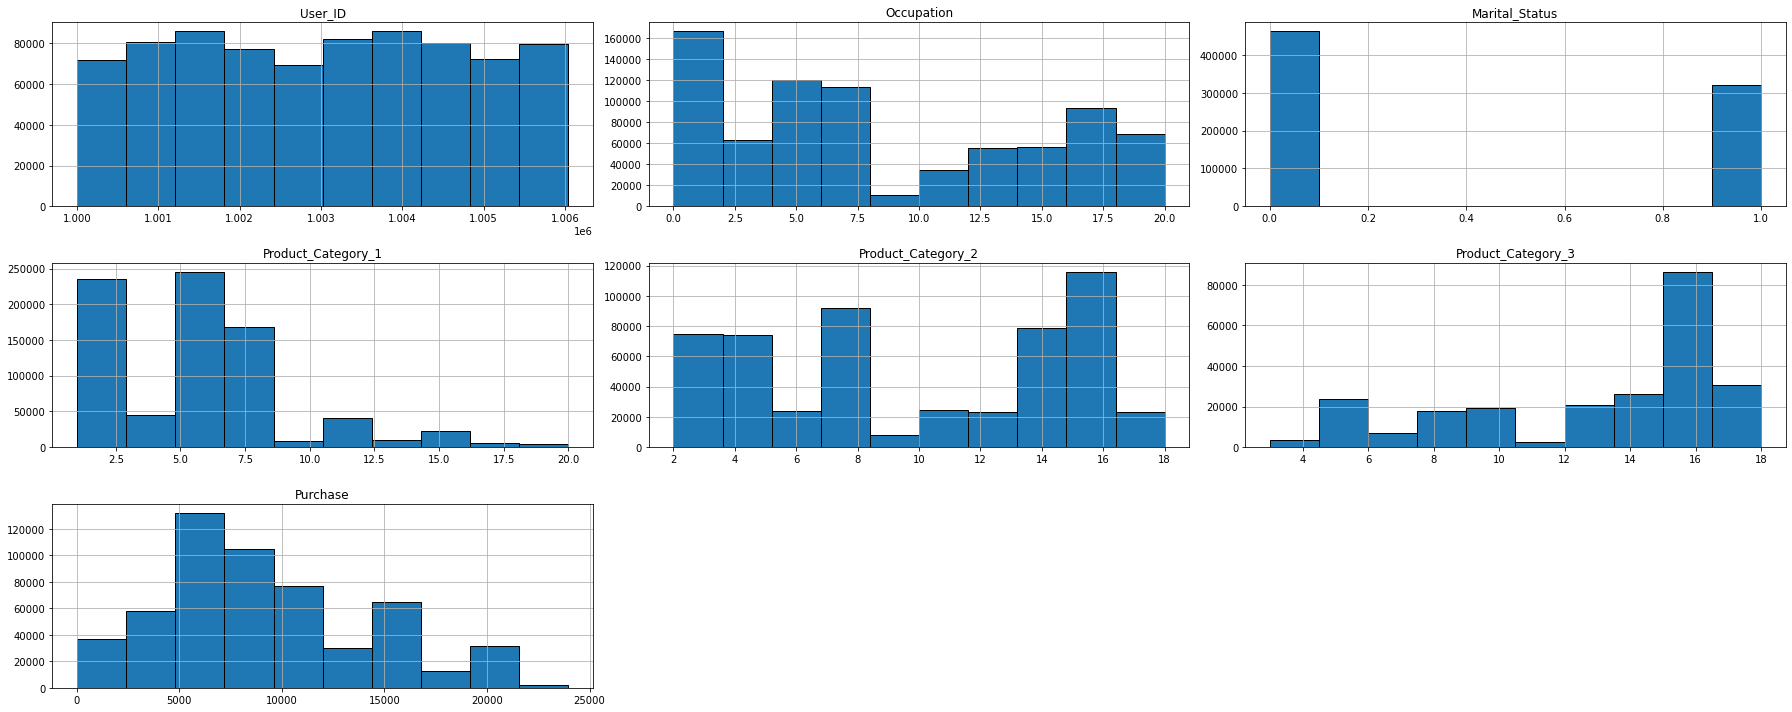

In [9]:
combined.hist(edgecolor = 'black')
plt.tight_layout()
plt.show()

In [10]:
# Cat variables
combined.select_dtypes(include='O').columns

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

Index(['P00265242', 'P00025442', 'P00110742', 'P00112142', 'P00046742'], dtype='object')


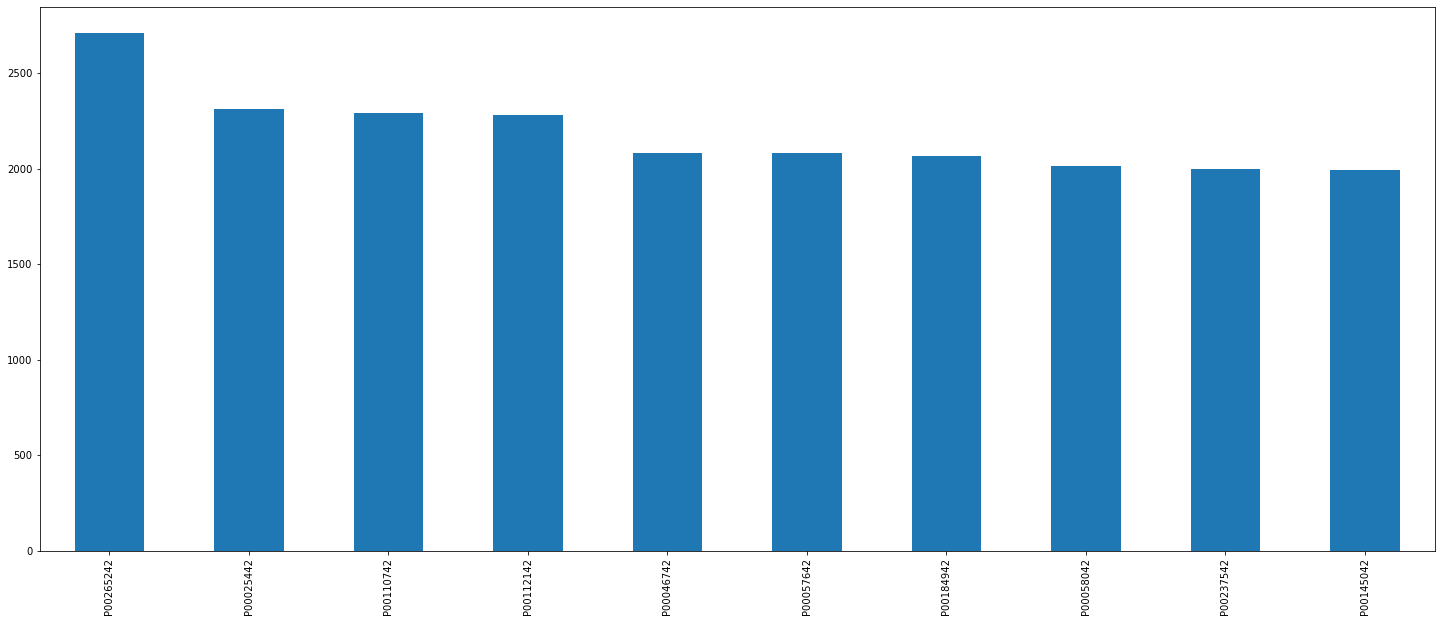

In [11]:
# Top 5 product IDs
print(combined.Product_ID.value_counts()[:5].index)
combined.Product_ID.value_counts()[:10].plot(kind='bar')
plt.show()

In [12]:
#Product Category

prods=['P00265242', 'P00025442', 'P00110742', 'P00112142', 'P00046742']

def prod_cat(x):
    if x in prods:
        return("Top5")
    else:
        return("Others")
    
combined["Product_Cat"] = combined.Product_ID.apply(prod_cat)

<AxesSubplot:xlabel='Product_Cat', ylabel='Purchase'>

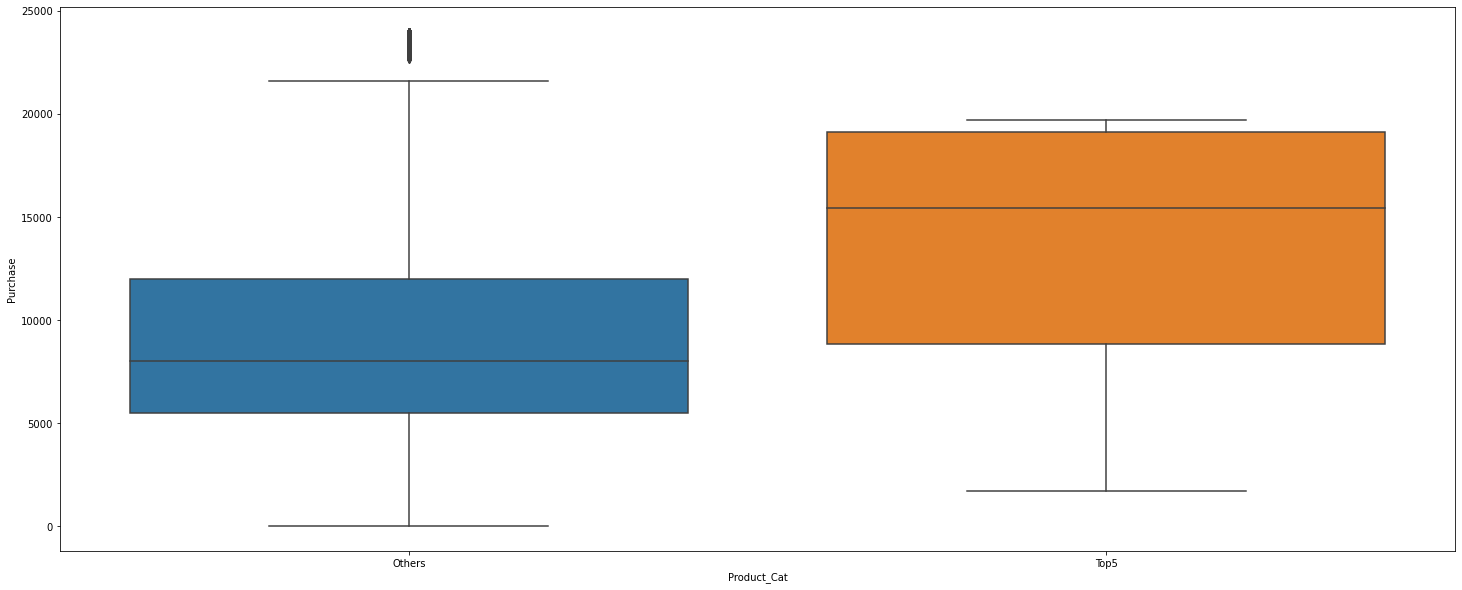

In [13]:
#Product category vs Target
sns.boxplot(combined["Product_Cat"], combined["Purchase"])

<AxesSubplot:>

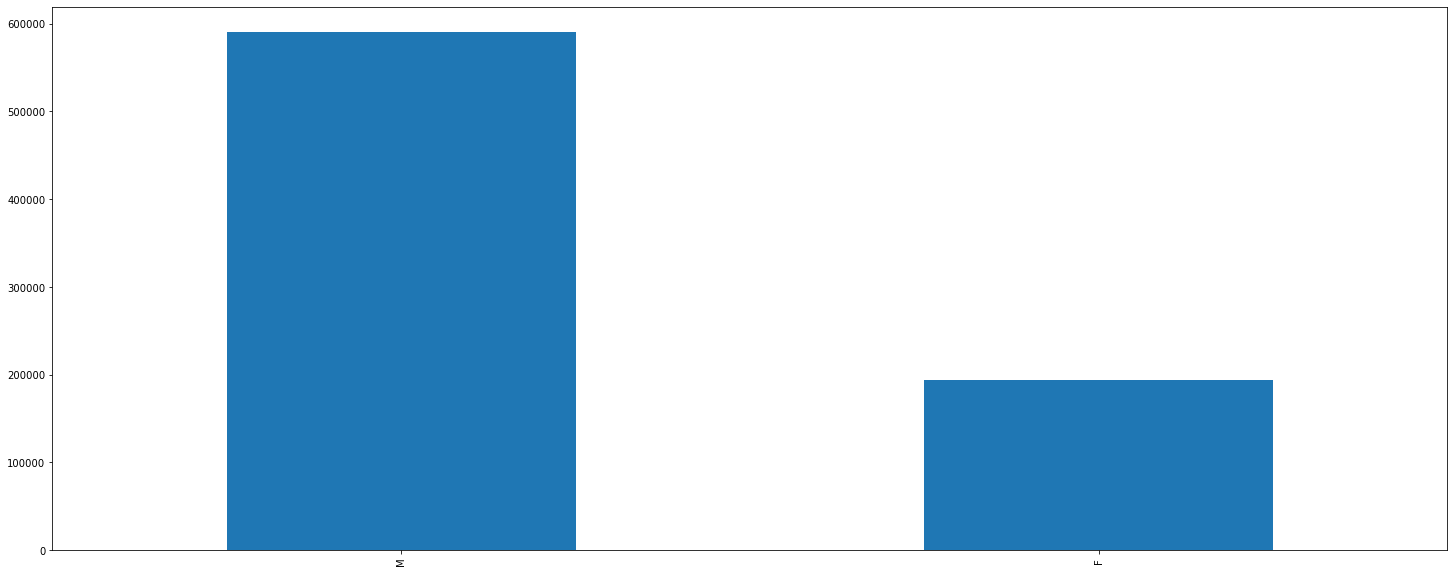

In [14]:
#Gender and Age

combined.Gender.value_counts().plot(kind="bar")

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64


<AxesSubplot:xlabel='Age', ylabel='count'>

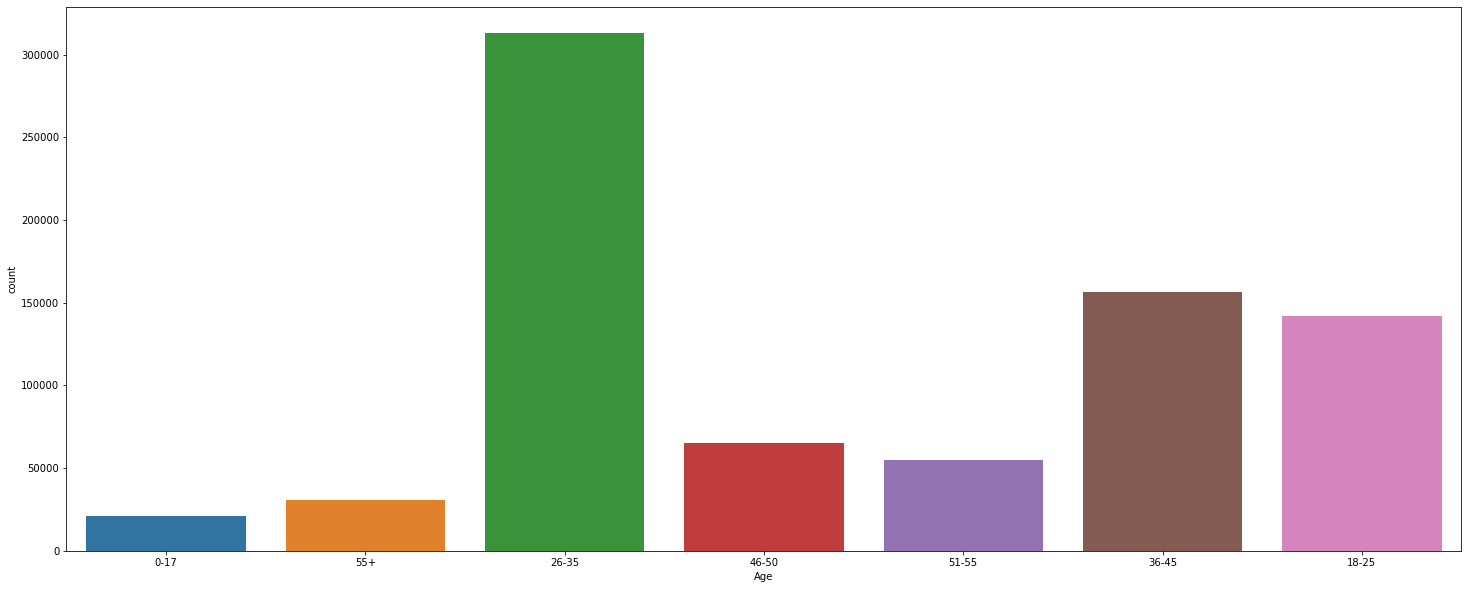

In [15]:
print(combined["Age"].value_counts())
sns.countplot(combined["Age"])

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

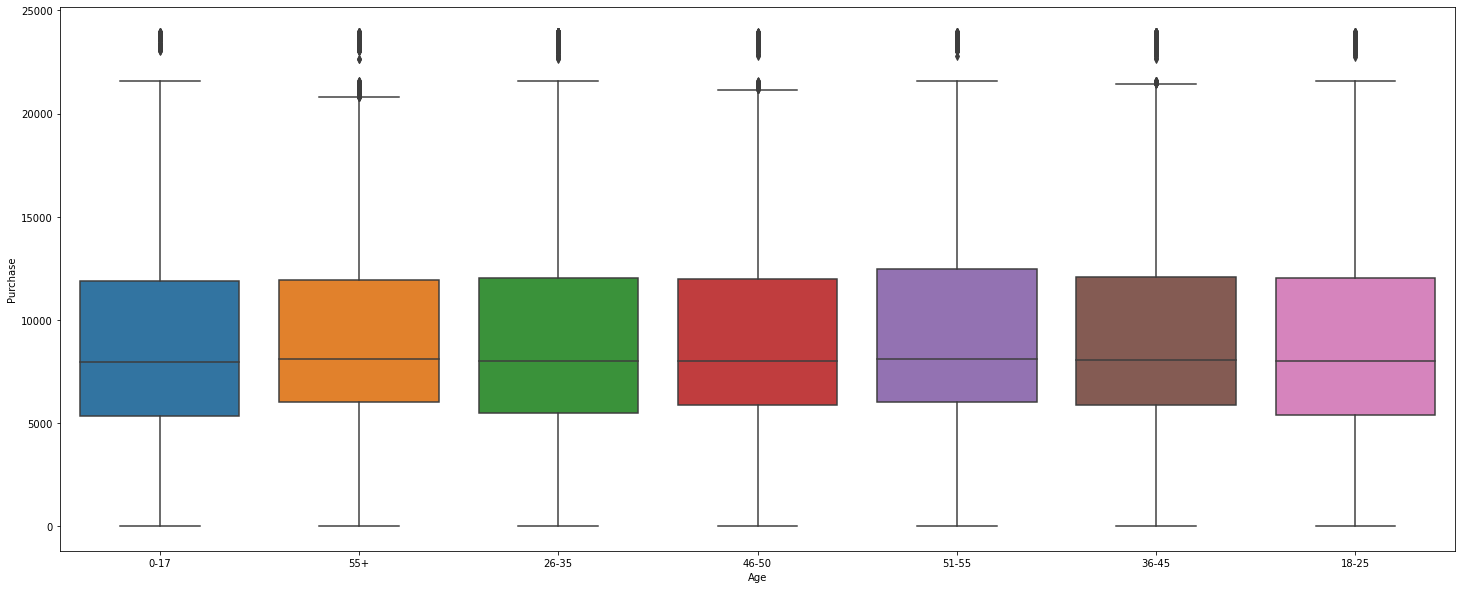

In [16]:
# boxplot purchase an d age

sns.boxplot(combined["Age"], combined["Purchase"])

In [17]:
#Age into numbers

combined.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [18]:
# creating new variables

combined[["Age1", "Age2"]] = combined.Age.str.split("-", expand= True)

In [19]:
combined["Age1"].unique()

array(['0', '55+', '26', '46', '51', '36', '18'], dtype=object)

In [20]:
combined["Age1"] = combined["Age1"].str.strip("+").astype("float")

In [21]:
combined["Age2"].unique()

array(['17', None, '35', '50', '55', '45', '25'], dtype=object)

In [22]:
#to remove null from age 2

combined.loc[combined["Age2"].isnull(), "Age2"]=55

In [23]:
#to remove 0 from age 1

combined.loc[combined["Age1"] == 0, "Age1"]=17

In [24]:
#average age

combined["Avg_Age"] = combined.loc[:, ["Age1", "Age2"]].mean(axis=1)
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Cat,Age1,Age2,Avg_Age
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,Others,17.0,17,17.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,Others,17.0,17,17.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,Others,17.0,17,17.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,Others,17.0,17,17.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,Others,55.0,55,55.0


In [25]:
#to find correlation with the target

combined.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Avg_Age
User_ID,1.000000,-0.023976,0.020276,0.004568,0.002291,0.002490,0.004716,0.032621,0.032621
Occupation,-0.023976,1.000000,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.096361,0.096361
Marital_Status,0.020276,0.023563,1.000000,0.019579,0.017131,0.018471,-0.000463,0.309754,0.309754
Product_Category_1,0.004568,-0.008441,0.019579,1.000000,0.540426,0.228299,-0.343703,0.060405,0.060405
Product_Category_2,0.002291,-0.000773,0.017131,0.540426,1.000000,0.543578,-0.209918,0.053432,0.053432
Product_Category_3,0.002490,0.010450,0.018471,0.228299,0.543578,1.000000,-0.022006,0.054491,0.054491
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.014839,0.014839
Age1,0.032621,0.096361,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000
Avg_Age,0.032621,0.096361,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000


In [26]:
#statistical test

import scipy.stats as stats

teststats, pvalue = stats.ttest_ind(combined["Avg_Age"], combined["Purchase"]) #not significant

In [27]:
#stay in current city
combined["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [28]:
combined["Stay_In_Current_City_Years"]= combined["Stay_In_Current_City_Years"].str.strip("+").astype("int")

In [29]:
combined["Stay_In_Current_City_Years"].unique()

array([2, 4, 3, 1, 0])

In [30]:
combined.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Product_Cat',
       'Age1', 'Age2', 'Avg_Age'],
      dtype='object')

In [31]:
#product category 1

combined["Product_Category_1"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [32]:
def prod_cat(x):
    if x in [5,8,1]:
        return("Top 3")
    else:
        return("Others")


In [33]:
combined["Prod1"] = combined["Product_Category_1"].apply(prod_cat)
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Cat,Age1,Age2,Avg_Age,Prod1
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,Others,17.0,17,17.0,Others
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,Others,17.0,17,17.0,Top 3
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,Others,17.0,17,17.0,Others
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,Others,17.0,17,17.0,Others
4,1000002,P00285442,M,55+,16,C,4,0,8,NaN,NaN,7969.0,Others,55.0,55,55.0,Top 3


In [34]:
# City category

combined["City_Category"].unique()



array(['A', 'C', 'B'], dtype=object)

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

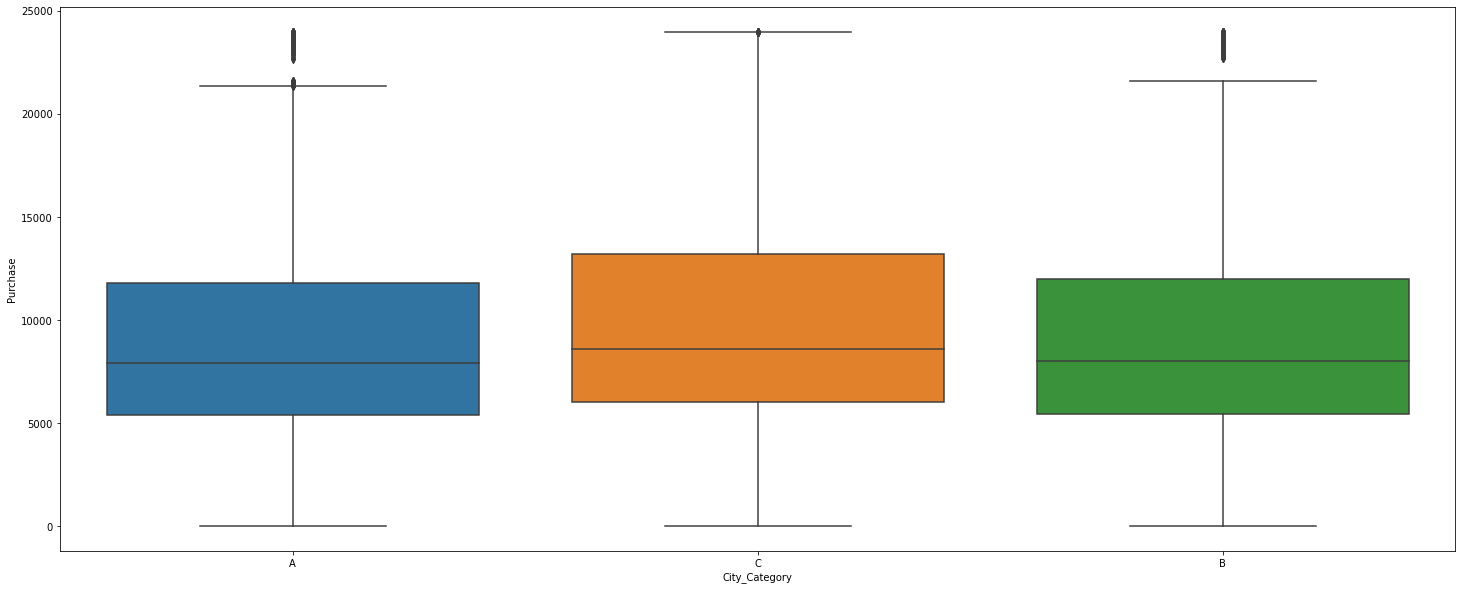

In [35]:
sns.boxplot(combined["City_Category"], combined["Purchase"])

In [36]:
combined.groupby(["City_Category"])["Purchase"].describe().T

City_Category,A,B,C
count,147720.000000,231173.000000,171175.000000
mean,8911.939216,9151.300563,9719.920993
std,4892.115238,4955.496566,5189.465121
min,12.000000,12.000000,12.000000
25%,5403.000000,5460.000000,6031.500000
50%,7931.000000,8005.000000,8585.000000
75%,11786.000000,11986.000000,13197.000000
max,23961.000000,23960.000000,23961.000000


In [37]:
#Take the city category and create and mean of purchase

combined["Mean_Tgt_City_Wise"] = combined.groupby(["City_Category"])["Purchase"].transform("mean")
combined["Median_Tgt_City_Wise"] = combined.groupby(["City_Category"])["Purchase"].transform("median")
combined["Std_Tgt_City_Wise"] = combined.groupby(["City_Category"])["Purchase"].transform("std")


In [38]:
combined.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Avg_Age,Mean_Tgt_City_Wise,Median_Tgt_City_Wise,Std_Tgt_City_Wise
User_ID,1.000000,-0.023976,-0.030000,0.020276,0.004568,0.002291,0.002490,0.004716,0.032621,0.032621,0.015785,0.010401,0.013293
Occupation,-0.023976,1.000000,0.028488,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.096361,0.096361,0.036727,0.036149,0.036635
Stay_In_Current_City_Years,-0.030000,0.028488,1.000000,-0.012871,-0.003518,-0.000994,0.000701,0.005422,-0.008269,-0.008269,0.016863,0.013177,0.015187
Marital_Status,0.020276,0.023563,-0.012871,1.000000,0.019579,0.017131,0.018471,-0.000463,0.309754,0.309754,0.038985,0.036361,0.037928
Product_Category_1,0.004568,-0.008441,-0.003518,0.019579,1.000000,0.540426,0.228299,-0.343703,0.060405,0.060405,-0.016402,-0.014246,-0.015455
Product_Category_2,0.002291,-0.000773,-0.000994,0.017131,0.540426,1.000000,0.543578,-0.209918,0.053432,0.053432,-0.010589,-0.008975,-0.009869
Product_Category_3,0.002490,0.010450,0.000701,0.018471,0.228299,0.543578,1.000000,-0.022006,0.054491,0.054491,-0.001323,-0.001077,-0.001211
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.014839,0.014839,0.063988,0.062708,0.063699
Age1,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,0.130025,0.121791,0.126747
Avg_Age,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,0.130025,0.121791,0.126747


In [39]:
# User ID

# count of users basis product

combined["Prod_Wise_User_Count"] = combined.groupby(["Product_ID"])["User_ID"].transform("nunique")
combined.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Avg_Age,Mean_Tgt_City_Wise,Median_Tgt_City_Wise,Std_Tgt_City_Wise,Prod_Wise_User_Count
User_ID,1.000000,-0.023976,-0.030000,0.020276,0.004568,0.002291,0.002490,0.004716,0.032621,0.032621,0.015785,0.010401,0.013293,0.004468
Occupation,-0.023976,1.000000,0.028488,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.096361,0.096361,0.036727,0.036149,0.036635,0.011603
Stay_In_Current_City_Years,-0.030000,0.028488,1.000000,-0.012871,-0.003518,-0.000994,0.000701,0.005422,-0.008269,-0.008269,0.016863,0.013177,0.015187,0.001934
Marital_Status,0.020276,0.023563,-0.012871,1.000000,0.019579,0.017131,0.018471,-0.000463,0.309754,0.309754,0.038985,0.036361,0.037928,-0.011130
Product_Category_1,0.004568,-0.008441,-0.003518,0.019579,1.000000,0.540426,0.228299,-0.343703,0.060405,0.060405,-0.016402,-0.014246,-0.015455,-0.232861
Product_Category_2,0.002291,-0.000773,-0.000994,0.017131,0.540426,1.000000,0.543578,-0.209918,0.053432,0.053432,-0.010589,-0.008975,-0.009869,-0.133294
Product_Category_3,0.002490,0.010450,0.000701,0.018471,0.228299,0.543578,1.000000,-0.022006,0.054491,0.054491,-0.001323,-0.001077,-0.001211,-0.060464
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.014839,0.014839,0.063988,0.062708,0.063699,0.319679
Age1,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,0.130025,0.121791,0.126747,-0.022485
Avg_Age,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,0.130025,0.121791,0.126747,-0.022485


In [40]:
# Product and Product Cat 1 user count

combined["Prod_Cat1_User_Count"] = combined.groupby(["Product_Category_1"])["User_ID"].transform("nunique")

In [41]:
combined.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Avg_Age,Mean_Tgt_City_Wise,Median_Tgt_City_Wise,Std_Tgt_City_Wise,Prod_Wise_User_Count,Prod_Cat1_User_Count
User_ID,1.000000,-0.023976,-0.030000,0.020276,0.004568,0.002291,0.002490,0.004716,0.032621,0.032621,0.015785,0.010401,0.013293,0.004468,-0.004643
Occupation,-0.023976,1.000000,0.028488,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.096361,0.096361,0.036727,0.036149,0.036635,0.011603,-0.004310
Stay_In_Current_City_Years,-0.030000,0.028488,1.000000,-0.012871,-0.003518,-0.000994,0.000701,0.005422,-0.008269,-0.008269,0.016863,0.013177,0.015187,0.001934,0.002131
Marital_Status,0.020276,0.023563,-0.012871,1.000000,0.019579,0.017131,0.018471,-0.000463,0.309754,0.309754,0.038985,0.036361,0.037928,-0.011130,-0.009130
Product_Category_1,0.004568,-0.008441,-0.003518,0.019579,1.000000,0.540426,0.228299,-0.343703,0.060405,0.060405,-0.016402,-0.014246,-0.015455,-0.232861,-0.582848
Product_Category_2,0.002291,-0.000773,-0.000994,0.017131,0.540426,1.000000,0.543578,-0.209918,0.053432,0.053432,-0.010589,-0.008975,-0.009869,-0.133294,-0.052251
Product_Category_3,0.002490,0.010450,0.000701,0.018471,0.228299,0.543578,1.000000,-0.022006,0.054491,0.054491,-0.001323,-0.001077,-0.001211,-0.060464,0.160078
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.014839,0.014839,0.063988,0.062708,0.063699,0.319679,0.028031
Age1,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,0.130025,0.121791,0.126747,-0.022485,-0.027207
Avg_Age,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,0.130025,0.121791,0.126747,-0.022485,-0.027207


In [42]:
#Purchase stats basis product ID


combined["Mean_Tgt_Prod_ID"] = combined.groupby(["Product_ID"])["Purchase"].transform("mean")
combined["Median_Tgt_Prod_ID"] = combined.groupby(["Product_ID"])["Purchase"].transform("median")
combined["Min_Tgt_Prod_ID"] = combined.groupby(["Product_ID"])["Purchase"].transform("min")
combined["Max_Tgt_Prod_ID"] = combined.groupby(["Product_ID"])["Purchase"].transform("max")
combined["Std_Tgt_Prod_ID"] = combined.groupby(["Product_ID"])["Purchase"].transform("std")


In [43]:
combined.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Avg_Age,Mean_Tgt_City_Wise,Median_Tgt_City_Wise,Std_Tgt_City_Wise,Prod_Wise_User_Count,Prod_Cat1_User_Count,Mean_Tgt_Prod_ID,Median_Tgt_Prod_ID,Min_Tgt_Prod_ID,Max_Tgt_Prod_ID,Std_Tgt_Prod_ID
User_ID,1.000000,-0.023976,-0.030000,0.020276,0.004568,0.002291,0.002490,0.004716,0.032621,0.032621,0.015785,0.010401,0.013293,0.004468,-0.004643,0.006088,0.005956,0.002325,0.000092,-0.006442
Occupation,-0.023976,1.000000,0.028488,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.096361,0.096361,0.036727,0.036149,0.036635,0.011603,-0.004310,0.019854,0.019313,0.017985,0.019116,0.016758
Stay_In_Current_City_Years,-0.030000,0.028488,1.000000,-0.012871,-0.003518,-0.000994,0.000701,0.005422,-0.008269,-0.008269,0.016863,0.013177,0.015187,0.001934,0.002131,0.001146,0.001166,0.001352,0.003594,0.004391
Marital_Status,0.020276,0.023563,-0.012871,1.000000,0.019579,0.017131,0.018471,-0.000463,0.309754,0.309754,0.038985,0.036361,0.037928,-0.011130,-0.009130,0.003334,0.002429,0.004886,-0.007862,-0.016393
Product_Category_1,0.004568,-0.008441,-0.003518,0.019579,1.000000,0.540426,0.228299,-0.343703,0.060405,0.060405,-0.016402,-0.014246,-0.015455,-0.232861,-0.582848,-0.394862,-0.386475,-0.359263,-0.461568,-0.460197
Product_Category_2,0.002291,-0.000773,-0.000994,0.017131,0.540426,1.000000,0.543578,-0.209918,0.053432,0.053432,-0.010589,-0.008975,-0.009869,-0.133294,-0.052251,-0.250626,-0.251594,-0.255925,-0.297840,-0.301987
Product_Category_3,0.002490,0.010450,0.000701,0.018471,0.228299,0.543578,1.000000,-0.022006,0.054491,0.054491,-0.001323,-0.001077,-0.001211,-0.060464,0.160078,-0.028277,-0.041558,-0.029602,-0.035411,-0.028252
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.014839,0.014839,0.063988,0.062708,0.063699,0.319679,0.028031,0.849659,0.839742,0.735215,0.797802,0.699741
Age1,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,0.130025,0.121791,0.126747,-0.022485,-0.027207,0.012350,0.009868,0.011143,-0.020177,-0.048410
Avg_Age,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,0.130025,0.121791,0.126747,-0.022485,-0.027207,0.012350,0.009868,0.011143,-0.020177,-0.048410


In [44]:
#Purchase stats basis product ID


combined["Mean_Tgt_User_ID"] = combined.groupby(["User_ID"])["Purchase"].transform("mean")
combined["Median_Tgt_User_ID"] = combined.groupby(["User_ID"])["Purchase"].transform("median")
combined["Min_Tgt_User_ID"] = combined.groupby(["User_ID"])["Purchase"].transform("min")
combined["Max_Tgt_User_ID"] = combined.groupby(["User_ID"])["Purchase"].transform("max")
combined["Std_Tgt_User_ID"] = combined.groupby(["User_ID"])["Purchase"].transform("std")


In [45]:
combined.shape

(783667, 32)

In [46]:
#null values

combined.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
Product_Cat                        0
Age1                               0
Age2                               0
Avg_Age                            0
Prod1                              0
Mean_Tgt_City_Wise                 0
Median_Tgt_City_Wise               0
Std_Tgt_City_Wise                  0
Prod_Wise_User_Count               0
Prod_Cat1_User_Count               0
Mean_Tgt_Prod_ID                  61
Median_Tgt_Prod_ID                61
Min_Tgt_Prod_ID                   61
Max_Tgt_Prod_ID                   61
Std_Tgt_Prod_ID                  272
M

In [47]:
#product on age

combined["Prod_Age_Bins"]= combined.groupby(["Product_ID"])["Age"].transform("nunique")
combined.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Avg_Age,Mean_Tgt_City_Wise,Median_Tgt_City_Wise,Std_Tgt_City_Wise,Prod_Wise_User_Count,Prod_Cat1_User_Count,Mean_Tgt_Prod_ID,Median_Tgt_Prod_ID,Min_Tgt_Prod_ID,Max_Tgt_Prod_ID,Std_Tgt_Prod_ID,Mean_Tgt_User_ID,Median_Tgt_User_ID,Min_Tgt_User_ID,Max_Tgt_User_ID,Std_Tgt_User_ID,Prod_Age_Bins
User_ID,1.000000,-0.023976,-0.030000,0.020276,0.004568,0.002291,0.002490,0.004716,0.032621,0.032621,0.015785,0.010401,0.013293,0.004468,-0.004643,0.006088,0.005956,0.002325,0.000092,-0.006442,0.014107,0.020833,-0.011002,0.018201,0.035780,0.005111
Occupation,-0.023976,1.000000,0.028488,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.096361,0.096361,0.036727,0.036149,0.036635,0.011603,-0.004310,0.019854,0.019313,0.017985,0.019116,0.016758,0.064003,0.053898,-0.012964,0.019097,0.051473,0.000539
Stay_In_Current_City_Years,-0.030000,0.028488,1.000000,-0.012871,-0.003518,-0.000994,0.000701,0.005422,-0.008269,-0.008269,0.016863,0.013177,0.015187,0.001934,0.002131,0.001146,0.001166,0.001352,0.003594,0.004391,0.017561,0.016503,0.018911,-0.013980,0.008029,0.001068
Marital_Status,0.020276,0.023563,-0.012871,1.000000,0.019579,0.017131,0.018471,-0.000463,0.309754,0.309754,0.038985,0.036361,0.037928,-0.011130,-0.009130,0.003334,0.002429,0.004886,-0.007862,-0.016393,-0.000847,0.011550,0.015130,0.030536,-0.019182,-0.005074
Product_Category_1,0.004568,-0.008441,-0.003518,0.019579,1.000000,0.540426,0.228299,-0.343703,0.060405,0.060405,-0.016402,-0.014246,-0.015455,-0.232861,-0.582848,-0.394862,-0.386475,-0.359263,-0.461568,-0.460197,-0.113473,-0.129816,-0.034221,0.043594,-0.015519,-0.094069
Product_Category_2,0.002291,-0.000773,-0.000994,0.017131,0.540426,1.000000,0.543578,-0.209918,0.053432,0.053432,-0.010589,-0.008975,-0.009869,-0.133294,-0.052251,-0.250626,-0.251594,-0.255925,-0.297840,-0.301987,-0.041100,-0.052731,-0.017086,0.038608,-0.002983,-0.028719
Product_Category_3,0.002490,0.010450,0.000701,0.018471,0.228299,0.543578,1.000000,-0.022006,0.054491,0.054491,-0.001323,-0.001077,-0.001211,-0.060464,0.160078,-0.028277,-0.041558,-0.029602,-0.035411,-0.028252,0.033844,0.025033,-0.012696,0.039088,0.035248,0.015765
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.014839,0.014839,0.063988,0.062708,0.063699,0.319679,0.028031,0.849659,0.839742,0.735215,0.797802,0.699741,0.322415,0.296645,0.057013,0.059118,0.179935,0.105734
Age1,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,0.130025,0.121791,0.126747,-0.022485,-0.027207,0.012350,0.009868,0.011143,-0.020177,-0.048410,0.046381,0.051524,0.007841,0.055318,-0.004581,0.006853
Avg_Age,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,0.130025,0.121791,0.126747,-0.022485,-0.027207,0.012350,0.009868,0.011143,-0.020177,-0.048410,0.046381,0.051524,0.007841,0.055318,-0.004581,0.006853


In [48]:
combined.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Avg_Age,Mean_Tgt_City_Wise,Median_Tgt_City_Wise,Std_Tgt_City_Wise,Prod_Wise_User_Count,Prod_Cat1_User_Count,Mean_Tgt_Prod_ID,Median_Tgt_Prod_ID,Min_Tgt_Prod_ID,Max_Tgt_Prod_ID,Std_Tgt_Prod_ID,Mean_Tgt_User_ID,Median_Tgt_User_ID,Min_Tgt_User_ID,Max_Tgt_User_ID,Std_Tgt_User_ID,Prod_Age_Bins
User_ID,1.000000,-0.023976,-0.030000,0.020276,0.004568,0.002291,0.002490,0.004716,0.032621,0.032621,0.015785,0.010401,0.013293,0.004468,-0.004643,0.006088,0.005956,0.002325,0.000092,-0.006442,0.014107,0.020833,-0.011002,0.018201,0.035780,0.005111
Occupation,-0.023976,1.000000,0.028488,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.096361,0.096361,0.036727,0.036149,0.036635,0.011603,-0.004310,0.019854,0.019313,0.017985,0.019116,0.016758,0.064003,0.053898,-0.012964,0.019097,0.051473,0.000539
Stay_In_Current_City_Years,-0.030000,0.028488,1.000000,-0.012871,-0.003518,-0.000994,0.000701,0.005422,-0.008269,-0.008269,0.016863,0.013177,0.015187,0.001934,0.002131,0.001146,0.001166,0.001352,0.003594,0.004391,0.017561,0.016503,0.018911,-0.013980,0.008029,0.001068
Marital_Status,0.020276,0.023563,-0.012871,1.000000,0.019579,0.017131,0.018471,-0.000463,0.309754,0.309754,0.038985,0.036361,0.037928,-0.011130,-0.009130,0.003334,0.002429,0.004886,-0.007862,-0.016393,-0.000847,0.011550,0.015130,0.030536,-0.019182,-0.005074
Product_Category_1,0.004568,-0.008441,-0.003518,0.019579,1.000000,0.540426,0.228299,-0.343703,0.060405,0.060405,-0.016402,-0.014246,-0.015455,-0.232861,-0.582848,-0.394862,-0.386475,-0.359263,-0.461568,-0.460197,-0.113473,-0.129816,-0.034221,0.043594,-0.015519,-0.094069
Product_Category_2,0.002291,-0.000773,-0.000994,0.017131,0.540426,1.000000,0.543578,-0.209918,0.053432,0.053432,-0.010589,-0.008975,-0.009869,-0.133294,-0.052251,-0.250626,-0.251594,-0.255925,-0.297840,-0.301987,-0.041100,-0.052731,-0.017086,0.038608,-0.002983,-0.028719
Product_Category_3,0.002490,0.010450,0.000701,0.018471,0.228299,0.543578,1.000000,-0.022006,0.054491,0.054491,-0.001323,-0.001077,-0.001211,-0.060464,0.160078,-0.028277,-0.041558,-0.029602,-0.035411,-0.028252,0.033844,0.025033,-0.012696,0.039088,0.035248,0.015765
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.014839,0.014839,0.063988,0.062708,0.063699,0.319679,0.028031,0.849659,0.839742,0.735215,0.797802,0.699741,0.322415,0.296645,0.057013,0.059118,0.179935,0.105734
Age1,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,0.130025,0.121791,0.126747,-0.022485,-0.027207,0.012350,0.009868,0.011143,-0.020177,-0.048410,0.046381,0.051524,0.007841,0.055318,-0.004581,0.006853
Avg_Age,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,0.130025,0.121791,0.126747,-0.022485,-0.027207,0.012350,0.009868,0.011143,-0.020177,-0.048410,0.046381,0.051524,0.007841,0.055318,-0.004581,0.006853


<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

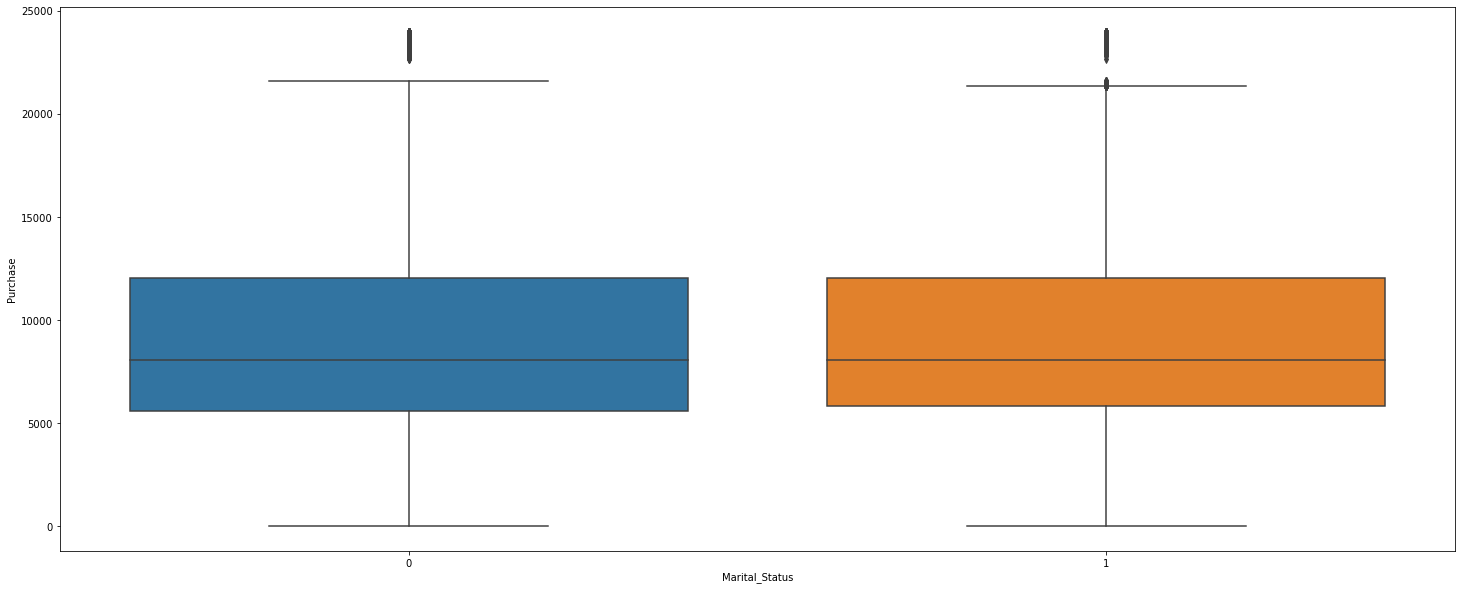

In [49]:
#occupation/ gender

sns.boxplot(combined["Marital_Status"], combined["Purchase"])

In [50]:
#dropping variables

new=combined.drop(["User_ID", "Product_ID", "Age1", "Age2", "Product_Category_2", "Product_Category_3"], axis=1)
new.shape

(783667, 27)

In [51]:
#missing values

new.isnull().sum()[new.isnull().sum()>0]

Purchase              233599
Mean_Tgt_Prod_ID          61
Median_Tgt_Prod_ID        61
Min_Tgt_Prod_ID           61
Max_Tgt_Prod_ID           61
Std_Tgt_Prod_ID          272
dtype: int64

In [52]:
#new.loc[new["Mean_Tgt_Prod_ID"].isnull()].head()

val = new["Min_Tgt_Prod_ID"].median()

new.loc[new["Min_Tgt_Prod_ID"].isnull(), "Min_Tgt_Prod_ID"]= val

In [53]:
val = new["Mean_Tgt_Prod_ID"].median()

new.loc[new["Mean_Tgt_Prod_ID"].isnull(), "Mean_Tgt_Prod_ID"]= val

In [54]:
val = new["Median_Tgt_Prod_ID"].median()

new.loc[new["Median_Tgt_Prod_ID"].isnull(), "Median_Tgt_Prod_ID"]= val

In [55]:
val = new["Mean_Tgt_Prod_ID"].median()

new.loc[new["Mean_Tgt_Prod_ID"].isnull(), "Mean_Tgt_Prod_ID"]= val

In [56]:
val = new["Max_Tgt_Prod_ID"].median()

new.loc[new["Max_Tgt_Prod_ID"].isnull(), "Max_Tgt_Prod_ID"]= val

In [57]:
val = new["Std_Tgt_Prod_ID"].median()

new.loc[new["Std_Tgt_Prod_ID"].isnull(), "Std_Tgt_Prod_ID"]= val

In [58]:
new.isnull().sum()[new.isnull().sum()>0]

Purchase    233599
dtype: int64

<AxesSubplot:>

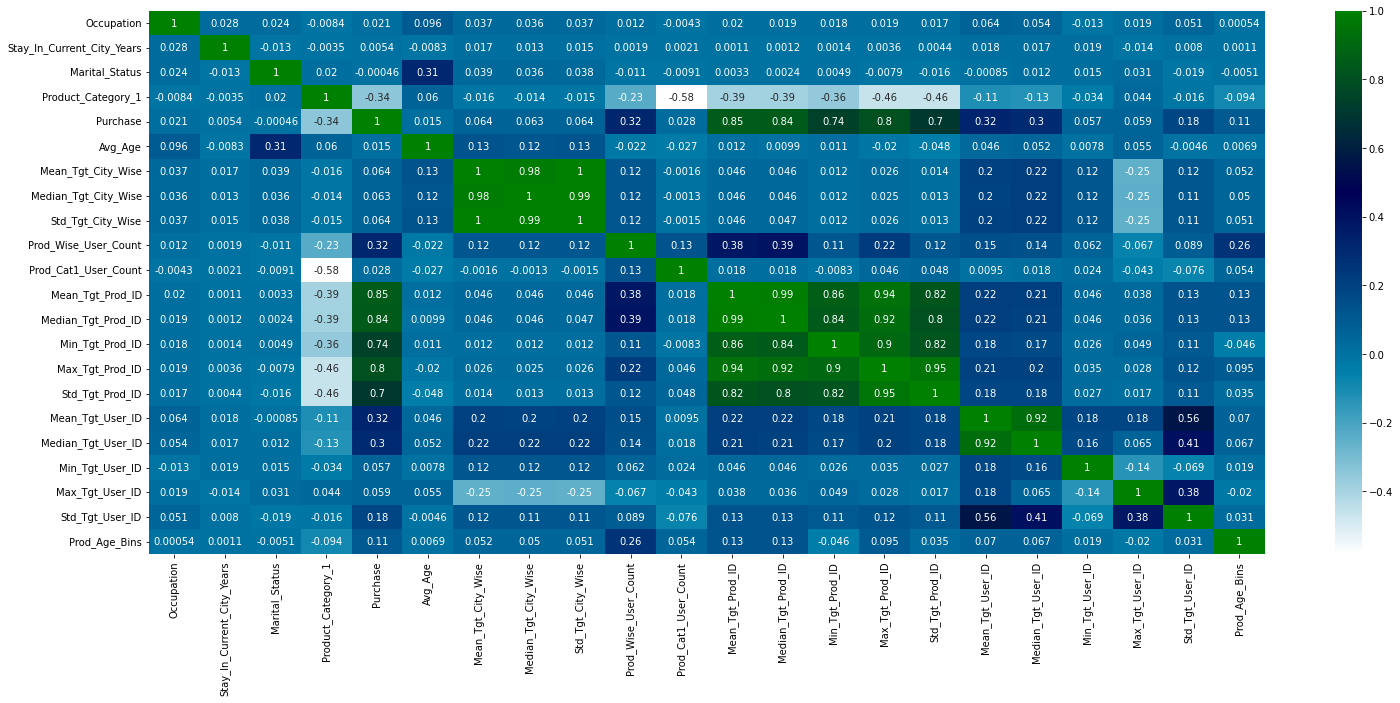

In [59]:
sns.heatmap(new.corr(), annot=True, cmap="ocean_r")

In [60]:
#split the data into train andtest

newtrain = new.loc[0:train.shape[0]-1, :]
newtest = new.loc[train.shape[0]:,:]

newtrain.shape, newtest.shape

((550068, 27), (233599, 27))

In [61]:
#drop purchase from newtest

newtest.drop(["Purchase"], axis=1, inplace=True)

In [62]:
newtest.Age.unique()

array(['46-50', '26-35', '36-45', '18-25', '51-55', '55+', '0-17'],
      dtype=object)

In [63]:
#drop the age from newtrain and newtest

newtrain.drop("Age", axis=1, inplace=True)
newtest.drop("Age",axis=1, inplace=True)


In [64]:
from sklearn.preprocessing import StandardScaler

X=newtrain.drop("Purchase", axis=1)
y=newtrain["Purchase"]

In [65]:
X.select_dtypes(include=np.number).columns

Index(['Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Avg_Age', 'Mean_Tgt_City_Wise',
       'Median_Tgt_City_Wise', 'Std_Tgt_City_Wise', 'Prod_Wise_User_Count',
       'Prod_Cat1_User_Count', 'Mean_Tgt_Prod_ID', 'Median_Tgt_Prod_ID',
       'Min_Tgt_Prod_ID', 'Max_Tgt_Prod_ID', 'Std_Tgt_Prod_ID',
       'Mean_Tgt_User_ID', 'Median_Tgt_User_ID', 'Min_Tgt_User_ID',
       'Max_Tgt_User_ID', 'Std_Tgt_User_ID', 'Prod_Age_Bins'],
      dtype='object')

In [66]:
num_cols=['Avg_Age', 'Mean_Tgt_City_Wise',
       'Median_Tgt_City_Wise', 'Std_Tgt_City_Wise', 'Prod_Wise_User_Count',
       'Prod_Cat1_User_Count', 'Mean_Tgt_Prod_ID', 'Median_Tgt_Prod_ID',
       'Min_Tgt_Prod_ID', 'Max_Tgt_Prod_ID', 'Std_Tgt_Prod_ID',
       'Mean_Tgt_User_ID', 'Median_Tgt_User_ID', 'Min_Tgt_User_ID',
       'Max_Tgt_User_ID', 'Std_Tgt_User_ID']

In [67]:
len(num_cols)

16

In [68]:
sc= StandardScaler()

for i in num_cols:
    X.loc[:,i] = sc.fit_transform(pd.DataFrame(X.loc[:,i]))
    newtest.loc[:,i] = sc.transform(pd.DataFrame(newtest.loc[:, i]))

In [69]:
X.head()

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Cat,Avg_Age,Prod1,Mean_Tgt_City_Wise,Median_Tgt_City_Wise,Std_Tgt_City_Wise,Prod_Wise_User_Count,Prod_Cat1_User_Count,Mean_Tgt_Prod_ID,Median_Tgt_Prod_ID,Min_Tgt_Prod_ID,Max_Tgt_Prod_ID,Std_Tgt_Prod_ID,Mean_Tgt_User_ID,Median_Tgt_User_ID,Min_Tgt_User_ID,Max_Tgt_User_ID,Std_Tgt_User_ID,Prod_Age_Bins
0,F,10,A,2,0,3,Others,-1.263331,Others,-1.095244,-0.827653,-0.972962,-0.572882,-1.029085,0.610816,0.829041,-0.014226,0.125597,-0.213342,0.173846,0.800335,0.230313,-1.119069,-0.147510,7
1,F,10,A,2,0,1,Others,-1.263331,Top 3,-1.095244,-0.827653,-0.972962,0.397124,0.553362,1.649542,1.393697,0.967194,1.193993,0.849300,0.173846,0.800335,0.230313,-1.119069,-0.147510,7
2,F,10,A,2,0,12,Others,-1.263331,Others,-1.095244,-0.827653,-0.972962,-0.948494,-3.274983,-1.880573,-1.806246,-1.850405,-2.005840,-1.915704,0.173846,0.800335,0.230313,-1.119069,-0.147510,7
3,F,10,A,2,0,12,Others,-1.263331,Others,-1.095244,-0.827653,-0.972962,-0.278589,-3.274983,-1.829670,-1.796269,-1.832880,-2.005483,-2.000281,0.173846,0.800335,0.230313,-1.119069,-0.147510,7
4,M,16,C,4,0,8,Others,2.203184,Top 3,1.418572,1.479449,1.454773,-0.690987,0.484895,-0.368146,-0.354810,0.999058,-0.524724,-0.949607,0.779027,0.775857,-0.527202,-0.398627,-0.661926,7


In [70]:
newtest.head()

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Cat,Avg_Age,Prod1,Mean_Tgt_City_Wise,Median_Tgt_City_Wise,Std_Tgt_City_Wise,Prod_Wise_User_Count,Prod_Cat1_User_Count,Mean_Tgt_Prod_ID,Median_Tgt_Prod_ID,Min_Tgt_Prod_ID,Max_Tgt_Prod_ID,Std_Tgt_Prod_ID,Mean_Tgt_User_ID,Median_Tgt_User_ID,Min_Tgt_User_ID,Max_Tgt_User_ID,Std_Tgt_User_ID,Prod_Age_Bins
550068,M,7,B,2,1,1,Others,1.382167,Top 3,-0.350536,-0.566605,-0.455480,1.341961,0.553362,1.527020,1.368202,1.009414,1.195243,1.081336,3.386054,3.876538,0.029026,-0.881594,1.619927,7
550069,M,17,C,0,0,3,Others,-0.442315,Others,1.418572,1.479449,1.454773,-0.520606,-1.029085,0.581716,0.578415,0.327519,0.125240,-0.385944,0.604577,0.693828,-0.496471,-0.588507,-0.036746,7
550070,F,1,B,4,1,5,Others,0.469926,Top 3,-0.350536,-0.566605,-0.455480,-0.818772,0.536968,-0.827723,-0.920797,-0.742325,-0.734119,-0.607089,0.286986,0.215979,-0.673173,-0.248327,-0.548806,7
550071,F,1,B,4,1,4,Others,0.469926,Others,-0.350536,-0.566605,-0.455480,-1.194383,-1.358882,-1.715299,-1.651946,-1.476000,-1.693444,-1.666590,0.286986,0.215979,-0.673173,-0.248327,-0.548806,6
550072,F,1,C,1,0,4,Others,-0.442315,Others,1.418572,1.479449,1.454773,0.273211,-1.358882,-1.564797,-1.496316,-1.578762,-1.688088,-1.576422,-0.806724,-0.705606,-0.524129,-0.640111,-0.184942,7


In [71]:
#One hot encoding

dummytrain= pd.get_dummies(X, drop_first= True)
dummytest = pd.get_dummies(newtest, drop_first= True)

dummytrain.shape, dummytest.shape

((550068, 26), (233599, 26))

In [72]:
X.columns

Index(['Gender', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Cat', 'Avg_Age',
       'Prod1', 'Mean_Tgt_City_Wise', 'Median_Tgt_City_Wise',
       'Std_Tgt_City_Wise', 'Prod_Wise_User_Count', 'Prod_Cat1_User_Count',
       'Mean_Tgt_Prod_ID', 'Median_Tgt_Prod_ID', 'Min_Tgt_Prod_ID',
       'Max_Tgt_Prod_ID', 'Std_Tgt_Prod_ID', 'Mean_Tgt_User_ID',
       'Median_Tgt_User_ID', 'Min_Tgt_User_ID', 'Max_Tgt_User_ID',
       'Std_Tgt_User_ID', 'Prod_Age_Bins'],
      dtype='object')

## modelling

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [74]:
kfold=KFold(n_splits = 5, shuffle=True, random_state= 0)

lr= LinearRegression()

pred=[]

for train_index, test_index in kfold.split(dummytrain,y):
    xtrain = dummytrain.iloc[train_index]
    xtest = dummytrain.iloc[test_index]
    ytrain = y.iloc[train_index]
    ytest = y.iloc[test_index]
    pred.append(lr.fit(xtrain,ytrain).predict(dummytest))
    
finalpred= pd.DataFrame(pred).T.mean(axis=1)

sub = pd.DataFrame({"Purchase":finalpred, "User_ID":test["User_ID"], "Product_ID":test["Product_ID"]})

sub.to_csv("LinearRegressionModel.csv") #2597.108997752803

In [75]:
dtree= DecisionTreeRegressor()

pred=[]

for train_index, test_index in kfold.split(dummytrain,y):
    xtrain = dummytrain.iloc[train_index]
    xtest = dummytrain.iloc[test_index]
    ytrain = y.iloc[train_index]
    ytest = y.iloc[test_index]
    pred.append(dtree.fit(xtrain,ytrain).predict(dummytest))
    
finalpred= pd.DataFrame(pred).T.mean(axis=1)

sub = pd.DataFrame({"Purchase":finalpred, "User_ID":test["User_ID"], "Product_ID":test["Product_ID"]})

sub.to_csv("DTreeModel.csv") #2775.4423564842


In [79]:
rf= RandomForestRegressor()

pred=[]

for train_index, test_index in kfold.split(dummytrain,y):
    xtrain = dummytrain.iloc[train_index]
    xtest = dummytrain.iloc[test_index]
    ytrain = y.iloc[train_index]
    ytest = y.iloc[test_index]
    pred.append(rf.fit(xtrain,ytrain).predict(dummytest))
    
finalpred= pd.DataFrame(pred).T.mean(axis=1)

sub = pd.DataFrame({"Purchase":finalpred, "User_ID":test["User_ID"], "Product_ID":test["Product_ID"]})

sub.to_csv("RFModel.csv")

KeyboardInterrupt: 

In [78]:
xgb= XGBRegressor()

pred=[]

for train_index, test_index in kfold.split(dummytrain,y):
    xtrain = dummytrain.iloc[train_index]
    xtest = dummytrain.iloc[test_index]
    ytrain = y.iloc[train_index]
    ytest = y.iloc[test_index]
    pred.append(xgb.fit(xtrain,ytrain).predict(dummytest))
    
finalpred= pd.DataFrame(pred).T.mean(axis=1)

sub = pd.DataFrame({"Purchase":finalpred, "User_ID":test["User_ID"], "Product_ID":test["Product_ID"]})

sub.to_csv("XGBModel.csv") #2502.5444450889045

In [77]:
gbm= GradientBoostingRegressor()

pred=[]

for train_index, test_index in kfold.split(dummytrain,y):
    xtrain = dummytrain.iloc[train_index]
    xtest = dummytrain.iloc[test_index]
    ytrain = y.iloc[train_index]
    ytest = y.iloc[test_index]
    pred.append(gbm.fit(xtrain,ytrain).predict(dummytest))
    
finalpred= pd.DataFrame(pred).T.mean(axis=1)

sub = pd.DataFrame({"Purchase":finalpred, "User_ID":test["User_ID"], "Product_ID":test["Product_ID"]})

sub.to_csv("GBModel.csv") #2563.0951996766994.

In [ ]:
# Parameter tuninig for xgboost

In [80]:
xgb2= XGBRegressor(n_estimators=40, max_depth=6)

pred=[]

for train_index, test_index in kfold.split(dummytrain,y):
    xtrain = dummytrain.iloc[train_index]
    xtest = dummytrain.iloc[test_index]
    ytrain = y.iloc[train_index]
    ytest = y.iloc[test_index]
    pred.append(xgb2.fit(xtrain,ytrain).predict(dummytest))
    
finalpred= pd.DataFrame(pred).T.mean(axis=1)

sub = pd.DataFrame({"Purchase":finalpred, "User_ID":test["User_ID"], "Product_ID":test["Product_ID"]})

sub.to_csv("XGBModel- Para.csv") #2525.15797605266